<a href="https://colab.research.google.com/github/jay10440/full-statistical-projects/blob/main/Time_Series_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: https://www.youtube.com/watch?v=Ct1iTGT1vbY

# Introduction to Time Series: Forecasting



In [ ]:
#Here, we'll attempt to install any necessary packages we may need for time series analysis.
#We'll start off by getting our forecast packages, pacman, and we'll ask gpt just in case.

install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
# We'll get pacman and then use that to install other packages.
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tidyverse")
install.packages("TSStudio")
install.packages("prophet")
install.packages("TSeries")
install.packages("zoo")
install.packages("xts")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘TSStudio’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘TSstudio’ ?”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘inline’, ‘gridExtra’, ‘loo’, ‘QuickJSR’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘BH’, ‘RcppEigen’


Warning message in install.packages("prophet"):
“installation of package ‘matrixStats’ had non-zero exit status”
Warning message in install.packages("prophet"):
“installation of pa

In [ ]:
#I think we have everything we need. Let's proceed to doing some time series.
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
#We'll try with rainfall data from Kaggle.
#IMPORTANT! Here's a process we can use to read in data into colab, according to
#GPT anyway:
#library(files)
#from google.colab import files
# uploaded<- files$upload()
#upload
library(shiny)
fileInput('file', 'Choose CSV File',
          accept=c('text/csv',
                   'text/comma-separated-values,text/plain',
                   '.csv'))

Shiny tags cannot be represented in plain text (need html)

In [ ]:
#I am QUITE upset that all I had to do was drag the stupid file
#into the folder environment... why are there so much CRAP on the
#internet! Anyway, reading this into the environment:
data<-read.csv("data_monthly_rainfall.csv")

In [ ]:
#Viewing the data
View(data)

Year,Station,Month,Rainfall,StationIndex
<int>,<chr>,<int>,<int>,<int>
1970,Barisal,1,0,2
1970,Barisal,2,24,2
1970,Barisal,3,5,2
1970,Barisal,4,91,2
1970,Barisal,5,124,2
1970,Barisal,6,408,2
1970,Barisal,7,530,2
1970,Barisal,8,317,2
1970,Barisal,9,571,2


In [ ]:
#Preparing the data for analysis:
library(ggplot2)

In [ ]:
pacman::p_load(dplyr,lubridate,forecast)

In [ ]:
data1<-filter(data, data$Year >= "2007")
data1<-filter(data1, Station == "Rajshahi")
View(data1)
data2<-select(data1,Rainfall)
data2
data2$Rainfall<- as.numeric(data2$Rainfall)
#Constructing the Time Series
RD<-ts(data2$Rainfall, start=2007, frequency=12)
RD

Year,Station,Month,Rainfall,StationIndex
<int>,<chr>,<int>,<int>,<int>
2007,Rajshahi,1,0,24
2007,Rajshahi,2,27,24
2007,Rajshahi,3,59,24
2007,Rajshahi,4,13,24
2007,Rajshahi,5,260,24
2007,Rajshahi,6,313,24
2007,Rajshahi,7,364,24
2007,Rajshahi,8,236,24
2007,Rajshahi,9,309,24


Rainfall
<int>
0
27
59
13
260
313
364
236
309


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2007,0,27,59,13,260,313,364,236,309,76,1,0
2008,26,0,0,30,144,247,373,245,129,121,0,0
2009,1,7,28,0,131,126,183,240,282,45,0,0
2010,0,2,2,37,75,211,94,101,101,127,3,39
2011,6,0,10,94,187,341,144,454,203,35,1,0
2012,6,0,6,123,17,137,314,179,178,102,101,1
2013,0,22,12,51,188,178,101,254,238,204,0,0
2014,0,27,12,51,151,188,242,359,153,5,0,0
2015,14,14,39,144,177,285,353,127,254,7,6,1
2016,42,3,25,175,212,109,376,168,170,95,0,0


In [ ]:
#Doing the Time Series Plot
plot(RD)

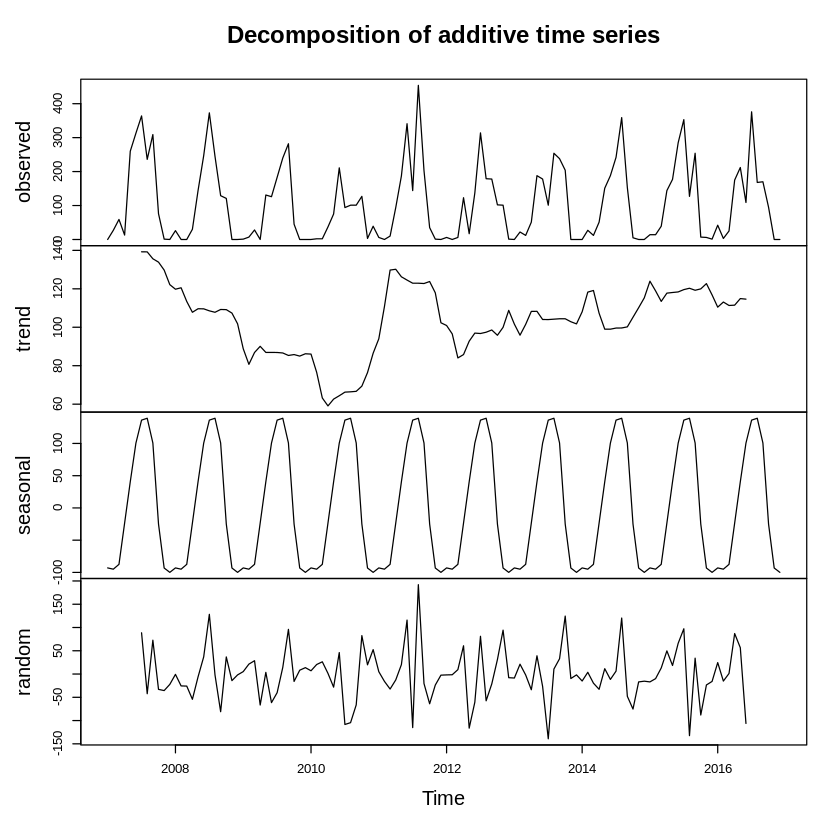

In [ ]:
#Decomposing (not sure what this does)
DRD<- decompose(RD)
plot(DRD)

In [ ]:
#Fitting an ARIMA
fitmr<-auto.arima(RD)
fitmr

Series: RD 
ARIMA(0,0,0)(2,1,0)[12] 

Coefficients:
         sar1     sar2
      -0.7061  -0.3468
s.e.   0.0922   0.0936

sigma^2 = 5435:  log likelihood = -620.14
AIC=1246.28   AICc=1246.51   BIC=1254.33

Evidently, the equation for this ARIMA is as follows:

$(1-B^{12})(1-\phi_1 B^{12}-\phi_2 B^{24})y_t=\epsilon_t$

Interesting they do this with backshift operators.

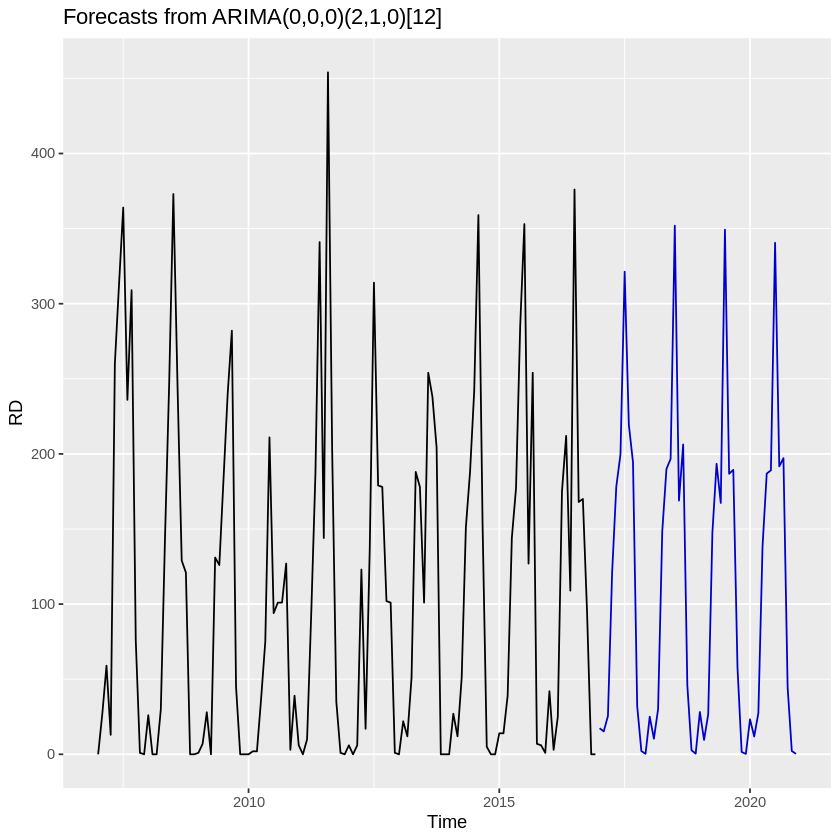

In [ ]:
#Forecasting!!
pred<-forecast(fitmr,4*12)
autoplot(pred,PI=F)

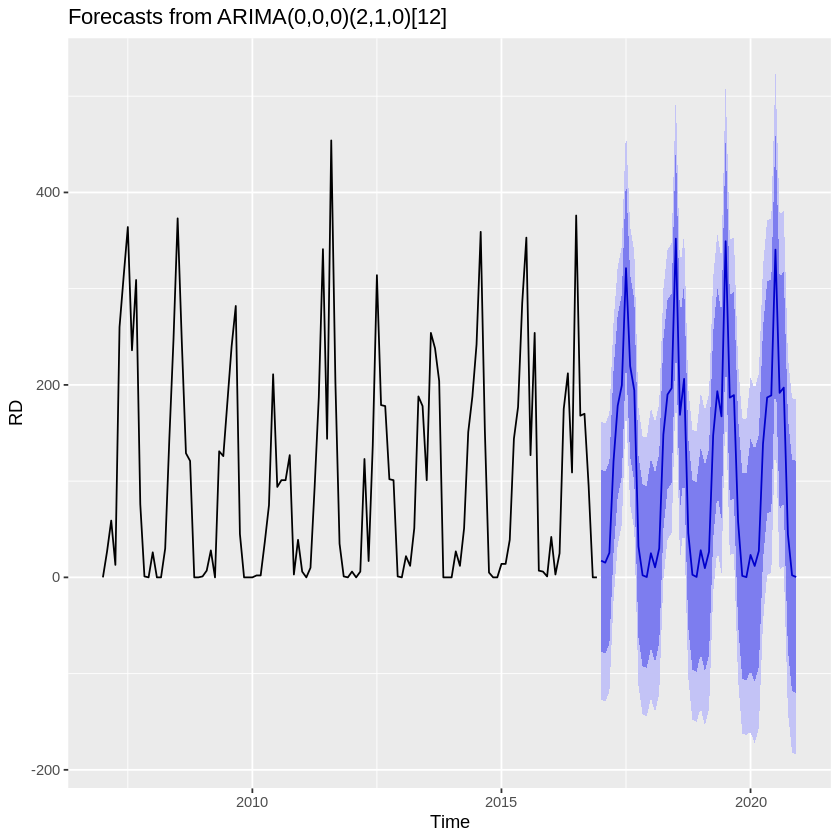

In [ ]:
autoplot(pred,PI=T)

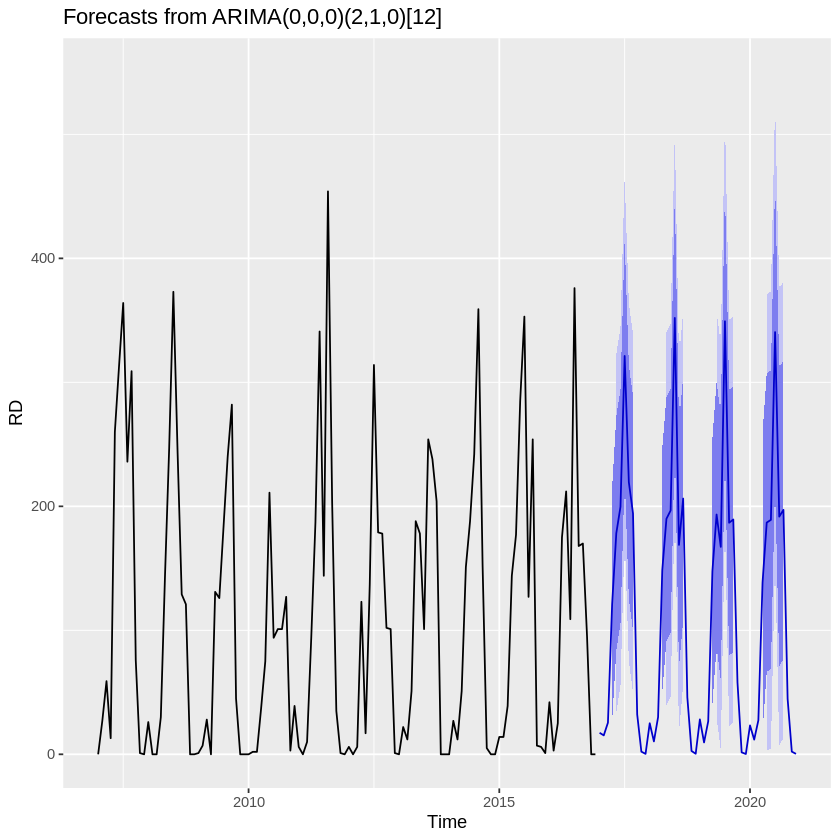

In [ ]:
autoplot(pred,PI=T)+ylim(0,550)

Fin.